In [1]:
# Starter

__author__ = "Philipp Kats"
from datetime import date
__date__ = date.today().strftime('%Y-%m-%d')

%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd
import geopandas as gp
import os
import json
import SE
import altair as alt

#from tqdm import tqdm, tqdm_notebook
#tqdm().pandas()
#from hyperdash import monitor_cell, Experiment
 

from SE.areas import get_all_areas, get_larger_area
from SE.sql import _get_DF
from SE import definitions
#from SE.sql import queries
idx = pd.IndexSlice

print(__date__)
print(SE.__version__)

2018-09-10
5.8.6


In [37]:
from SE.spatial import MERCATOR_CRS, NYC_CRS

In [2]:
from SE.vega import altair
import pdvega

In [3]:
all_custom_boundaries = pd.read_msgpack('../data/raw_boundaries.msg')

In [4]:
all_custom_boundaries.shape

(560299, 4)

In [5]:
all_custom_boundaries.dtypes

boundary_name            object
id                        int64
geometry                 object
created_at       datetime64[ns]
dtype: object

In [6]:
all_custom_boundaries.head(3)

,boundary_name,id,geometry,created_at
0,ues3,20841,"POLYGON((-73.97087 40.76422,-73.95928 40.78018...",2012-05-02 18:32:46
1,Upper East Midtown East,21131,"POLYGON((-73.96271 40.75297,-73.96649 40.74998...",2012-05-06 15:41:07
2,Upper East-ish,28191,"POLYGON((-73.97245 40.76477,-73.95619 40.78723...",2012-07-24 13:17:14


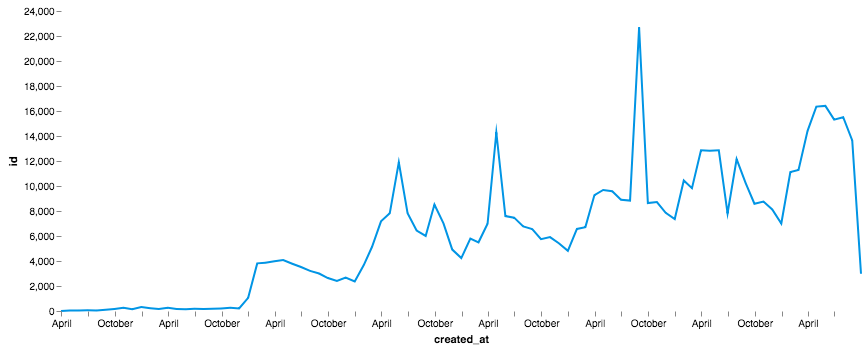

In [7]:
monthly = all_custom_boundaries.groupby(pd.Grouper(key='created_at', freq='1M'))['id'].count()
monthly.vgplot(width=800)

## NOTE: is it SE style or Altair making month labels instead of year ones?

# Cleaning Geometry

### A. Parsing WKT

In [8]:
from SE.spatial.spatial import _tryParseWKT

In [9]:
all_custom_boundaries['geometry'] = all_custom_boundaries['geometry'].apply(_tryParseWKT)

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
Could not create geometry because 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of point

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: In

Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' ob

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
Ille

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - m

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: po

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' ob

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: In

'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points i

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException:

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contai

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' ob

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

Ille

Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points i

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of point

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
Could not create geometry because of errors while readi

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
I

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

Ille

Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: In

Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of point

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of point

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException:

'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points i

'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute '

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4
IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribu

IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry becaus

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements




'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attrib

IllegalArgumentException: point array must contain 0 or >1 elements



Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'


IllegalArgumentException: point array must contain 0 or >1 elements



'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'
'NoneType' 

IllegalArgumentException: point array must contain 0 or >1 elements



Could not create geometry because of errors while reading input.
'NoneType' object has no attribute 'encode'
'NoneType' object has no attribute 'encode'


In [10]:
print(f'Invalid geometry: {all_custom_boundaries.geometry.isnull().sum() / len(all_custom_boundaries):0.2%}')

Invalid geometry: 5.87%


In [11]:
correct_geom = all_custom_boundaries[all_custom_boundaries.geometry.notnull()]
correct_geom = gp.GeoDataFrame(correct_geom)

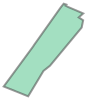

In [12]:
correct_geom.geometry.iloc[1]

In [13]:
len(all_custom_boundaries)

560299

### B. Dropping clearly outside NY

In [14]:
from shapely.geometry import Polygon
from SE.spatial import get_better_boundaries

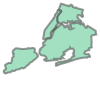

In [15]:
nyc = get_better_boundaries(area_type='city')['geometry'].iloc[0]
nyc

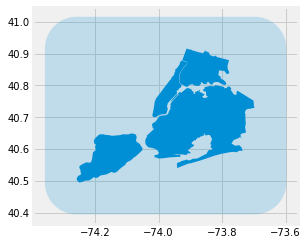

In [16]:
ax=gp.GeoSeries([nyc.envelope.buffer(.1)]).plot(alpha=.2)  # 1 degree
get_better_boundaries(area_type='city').plot(ax=ax)

In [17]:
m1 = correct_geom.geometry.within(nyc.envelope.buffer(.1))

In [18]:
(~m1).sum()

2374

In [19]:
correct_geom = correct_geom[m1]

In [20]:
m2 = correct_geom.geometry.intersects(nyc)

In [21]:
m2.all()

False

In [22]:
correct_geom = correct_geom[m2]

### C. Drop Self-intersecting

In [23]:
len(correct_geom)

523403

In [24]:
m3 = correct_geom.geometry.is_valid
f'{m3.sum() / len(m3):.2%}'

'98.60%'

In [25]:
correct_geom = correct_geom[m3]

In [26]:
len(correct_geom)

516070

In [28]:
f'Dropped {len(all_custom_boundaries) - len(correct_geom):,.0f} boundaries'

'Dropped 44,229 boundaries'

### D. Dropping default rects 

there is a bunch of boundaries which are just default rectangular; lets drop those too!

In [41]:
correct_geom.crs = MERCATOR_CRS
correct_geom.to_crs(NYC_CRS, inplace=True)

In [81]:
Q = f"""
    SELECT boundaries_users.boundary_name,
           boundaries.id,
           AsText(boundaries.geometry) as geometry,
           boundaries.created_at
    FROM boundaries_users LEFT JOIN  boundaries ON boundaries_users.boundary_id = boundaries.id
    WHERE boundaries_users.boundary_name = 'TEST TEST TEST';
    """

T = _get_DF(Q)

In [82]:
T['geometry'] = T['geometry'].apply(_tryParseWKT, verbose=False)
T = gp.GeoDataFrame(T)

In [83]:
T.crs = MERCATOR_CRS
T.to_crs(NYC_CRS, inplace=True)

In [85]:
M = correct_geom.area == T.area[0]

In [86]:
M.sum()

6197

In [54]:
# mask = M & (correct_geom.area < d.to_crs(NYC_CRS).area.iloc[0] * 10)

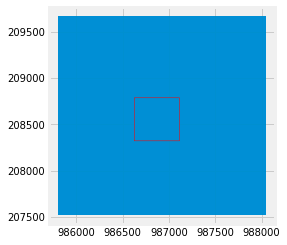

In [88]:
correct_geom[M].plot(alpha=.2)

In [95]:
correct_geom = correct_geom[~M]

### Drop too large ones

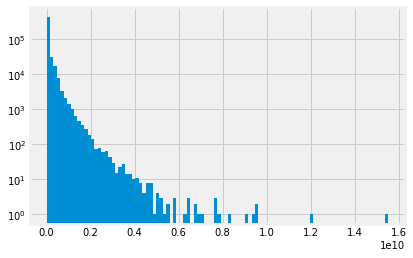

In [96]:
correct_geom.area.hist(bins=100, log=True)

In [97]:
f'{correct_geom.area.quantile(.95):,.2f}'

'394,542,343.32'

In [98]:
cb_small = correct_geom[correct_geom.area <= 1000_000_000]  ## Drop too large ones

In [99]:
cb_small.to_pickle('../data/correct_geom.pkl')